In [1]:
# import torch
# import torch.nn as nn
# import numpy as np
# import torch.nn.functional as F
# from random import randint
# import utils
# import time

# 1. Basics (labs_lecture02)

In [2]:
import torch
import numpy as np

## 1.1 Tensor Initialization


#### 1.1.1 Init from NP array
+ torch.Tensor()**
+ torch.tensor()
+ torch.as_tensor()**
+ torch.from_numpy()

In [3]:
# How to initialize a tensor from a numpy array?
data = np.array([1,2,3]); print(f"np array: {data}")
print(f"PyTorch default dtype: ", torch.get_default_dtype())

t1 = torch.Tensor(data) # torch.get_default_dtype()
t2 = torch.tensor(data) # dtype=torch.float32 # will infer dtype
t3 = torch.as_tensor(data) # preferred over from_numpy #int32
t4 = torch.from_numpy(data) #int32
print(f"torch.Tensor: {t1.dtype}")
print(f"torch.tensor (will infer dtype): {t2.dtype}")
print(f"torch.as_tensor (preferred over from_numpy): {t3.dtype}")

np array: [1 2 3]
PyTorch default dtype:  torch.float32
torch.Tensor: torch.float32
torch.tensor (will infer dtype): torch.int32
torch.as_tensor (preferred over from_numpy): torch.int32


#### 1.1.2 Random/ Zero/ Identity Tensor

In [4]:
rand_t = torch.rand(2,3,4); print(f"rand: {rand_t}")
zero_t = torch.zeros(2,3,4); print(f"zeros: {zero_t}")
eye_t = torch.eye(3); print(f"eye: {eye_t}")

rand: tensor([[[0.0441, 0.5818, 0.9518, 0.9290],
         [0.3017, 0.0011, 0.0738, 0.2503],
         [0.8145, 0.9746, 0.6286, 0.1391]],

        [[0.3649, 0.4652, 0.7474, 0.6274],
         [0.0635, 0.2606, 0.9394, 0.0419],
         [0.1619, 0.8936, 0.5765, 0.8157]]])
zeros: tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
eye: tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


#### 1.1.3 Long Tensor (Integers)

In [5]:
# integer tensor MUST HAVE BRACKETS
int_t1 = torch.LongTensor([1,1]); print(f"LongTensor: {int_t1}")
int_t2 = torch.tensor([2,2], dtype=torch.int32) ; print(f"tensor(dtype=torch.int32): {int_t2}")
int_t3 = torch.tensor([3,3]).long(); print(f".long(): {int_t3}")

LongTensor: tensor([1, 1])
tensor(dtype=torch.int32): tensor([2, 2], dtype=torch.int32)
.long(): tensor([3, 3])


#### 1.1.4 Various Tensor Functions
+ .shape, .size()
+ .dim()
+ .type()
+ .view(), .reshape()
+ .arange(n), .randperm(n)
+ .item()

In [6]:
print_t = torch.rand([2,3,4])
print(f"Shape: {print_t.shape} and size: {print_t.size()}")
print(f"Dimension of Tensor: {print_t.dim()}")

Shape: torch.Size([2, 3, 4]) and size: torch.Size([2, 3, 4])
Dimension of Tensor: 3


In [7]:
print(f"view: {print_t.view(3,8)}") 
print(f"reshape: {print_t.reshape(-1, 6)}")
print(f"print_t is not modified until assigned: {print_t}")

view: tensor([[0.5071, 0.7623, 0.1926, 0.6030, 0.1946, 0.9809, 0.3356, 0.5836],
        [0.5090, 0.7162, 0.3212, 0.0169, 0.2601, 0.7724, 0.4464, 0.3978],
        [0.8442, 0.8521, 0.6591, 0.7549, 0.5071, 0.3653, 0.2454, 0.4709]])
reshape: tensor([[0.5071, 0.7623, 0.1926, 0.6030, 0.1946, 0.9809],
        [0.3356, 0.5836, 0.5090, 0.7162, 0.3212, 0.0169],
        [0.2601, 0.7724, 0.4464, 0.3978, 0.8442, 0.8521],
        [0.6591, 0.7549, 0.5071, 0.3653, 0.2454, 0.4709]])
print_t is not modified until assigned: tensor([[[0.5071, 0.7623, 0.1926, 0.6030],
         [0.1946, 0.9809, 0.3356, 0.5836],
         [0.5090, 0.7162, 0.3212, 0.0169]],

        [[0.2601, 0.7724, 0.4464, 0.3978],
         [0.8442, 0.8521, 0.6591, 0.7549],
         [0.5071, 0.3653, 0.2454, 0.4709]]])


In [8]:
ar_t = torch.arange(10); print(f"arange(n): {ar_t}") # ordered 0 to 9
randp_t = torch.randperm(10); print(f"randperm(n): {randp_t}") # random 0 to 9

arange(n): tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
randperm(n): tensor([2, 9, 4, 7, 3, 8, 0, 1, 6, 5])


In [9]:
# 0-dimensional tensor is a scalar => item()


## 1.2 Slicing of Tensor

In [10]:
A = torch.rand(10,2)
v = A[2] # third row
B = A[:5] # first 5 rows (0-4)
x = A[0,0].item()
print(A, v)
print(B, x)

tensor([[0.1080, 0.4091],
        [0.2669, 0.1202],
        [0.5707, 0.0643],
        [0.9026, 0.5751],
        [0.9312, 0.5550],
        [0.0501, 0.7119],
        [0.3494, 0.5596],
        [0.0743, 0.4729],
        [0.0132, 0.8041],
        [0.5605, 0.2706]]) tensor([0.5707, 0.0643])
tensor([[0.1080, 0.4091],
        [0.2669, 0.1202],
        [0.5707, 0.0643],
        [0.9026, 0.5751],
        [0.9312, 0.5550]]) 0.10796594619750977


In [11]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship','Truck']
label_idx = dict(zip(range(len(labels)), labels))
print(label_idx)
print(labels[1:1+5]) # 1:6 exclusive

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}
['Automobile', 'Bird', 'Cat', 'Deer', 'Dog']


## 1.3 Additional

In [12]:
# list slicing
some_list = list(range(6)); print(f"Ori: \t\t{some_list}")
all_list = some_list[:]; print(f"[:]: \t\t{all_list}")
sliced_list = some_list[1:4]; print(f"[1:4]: \t\t{sliced_list}") # first inclusive, last exclusive
sliced_list = some_list[1:]; print(f"[1:]: \t\t{sliced_list}") # first inclusive
sliced_list = some_list[:4]; print(f"[:4]: \t\t{sliced_list}") # last exclusive
sliced_list = some_list[:-1]; print(f"[:-1]: \t\t{sliced_list}") # last exclusive
sliced_list = some_list[1:4:2]; print(f"[1:4:2]:\t{sliced_list}") # last exclusive

Ori: 		[0, 1, 2, 3, 4, 5]
[:]: 		[0, 1, 2, 3, 4, 5]
[1:4]: 		[1, 2, 3]
[1:]: 		[1, 2, 3, 4, 5]
[:4]: 		[0, 1, 2, 3]
[:-1]: 		[0, 1, 2, 3, 4]
[1:4:2]:	[1, 3]


In [13]:
# tensor slicing
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]]); print(f"Ori \t{points}\n")
sliced_points = points[1:]; print(f"[1:] \t{sliced_points}\n")     # all rows after first; all columns (implicit)
sliced_points = points[1:,:]; print(f"[1:,:] \t{sliced_points}\n") # all rows after first; all columns
sliced_points = points[1:,0]; print(f"[1:,0] \t{sliced_points}\n") # all rows after first; first column
sliced_points = points[None]; print(f"[None] \t{sliced_points}\n") # adds a dim of size 1, like unsqueeze

Ori 	tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

[1:] 	tensor([[5., 3.],
        [2., 1.]])

[1:,:] 	tensor([[5., 3.],
        [2., 1.]])

[1:,0] 	tensor([5., 2.])

[None] 	tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])



In [14]:
x = torch.Tensor([[1,2,3],[6,5,4]]); print(f"{x} {x.shape}\n")
# find max in each rows
max_value, max_idx = torch.max(x, dim=1)
print(f"torch.max(): \t{max_value}, {max_idx}")
# find sum across rows
sum_x = torch.sum(x, dim=1)
print(f"torch.sum(): \t{sum_x}\n")
y = torch.randn(2, 3)
z = x + y; print(z)
x.add_(y); print(x) #auto add inplace

tensor([[1., 2., 3.],
        [6., 5., 4.]]) torch.Size([2, 3])

torch.max(): 	tensor([3., 6.]), tensor([2, 0])
torch.sum(): 	tensor([ 6., 15.])

tensor([[ 0.4818, -0.0694,  0.9956],
        [ 5.4096,  6.8551,  3.8205]])
tensor([[ 0.4818, -0.0694,  0.9956],
        [ 5.4096,  6.8551,  3.8205]])


In [15]:
a = torch.ones(3, 2)
a_t = torch.transpose(a, 0, 1)
a_t2 = a.transpose(0, 1) #same!
a_t3 = a.t()
print(a, a.size())
print(a_t, a_t.size())
print(a_t2, a_t2.size())
print(a_t3, a_t3.size())
print(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) torch.Size([3, 2])
tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.Size([2, 3])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [16]:
x = torch.Tensor([1,1,2]); print(x)
y = torch.Tensor([1,2,3]); print(y)
z = torch.matmul(x, y); print(z)

tensor([1., 1., 2.])
tensor([1., 2., 3.])
tensor(9.)


In [17]:
W = torch.LongTensor([[1,1,1,1,1],[0,5,0,5,0],[2,2,2,2,2]]); print(W)
print(W.T)

tensor([[1, 1, 1, 1, 1],
        [0, 5, 0, 5, 0],
        [2, 2, 2, 2, 2]])
tensor([[1, 0, 2],
        [1, 5, 2],
        [1, 0, 2],
        [1, 5, 2],
        [1, 0, 2]])


In [18]:
W = torch.LongTensor([[1,2,3],[4,5,6]]); print(f"W: {W.shape}")
x = torch.LongTensor([1,-2,2]); print(f"x: {x.shape}")
b = torch.LongTensor([7, 10]); print(f"b: {b.shape}")
z = torch.matmul(W,x)+b
print(f"z: {z} {z.shape}")

W: torch.Size([2, 3])
x: torch.Size([3])
b: torch.Size([2])
z: tensor([10, 16]) torch.Size([2])


In [19]:
A = torch.LongTensor([[1,1,1],[2,3,0]])
B = torch.LongTensor([[1,2,1,1],[2,0,1,1],[3,2,1,1]])
C = torch.mm(A,B)
print(C)

tensor([[6, 4, 3, 3],
        [8, 4, 5, 5]])


In [20]:
# outer product
x = torch.LongTensor([1,2,3]).unsqueeze(1) #3x1
y = torch.LongTensor([0,1,2]) #1x3
outerpdt = x * y #3x3
print(outerpdt)

tensor([[0, 1, 2],
        [0, 2, 4],
        [0, 3, 6]])


In [21]:
A = torch.LongTensor([[1,1,1,1,1,1],[0,0,2,2,0,1],[1,2,3,0,0,0]])
B = torch.LongTensor([[0,0],[0,1],[0,0],[1,1],[2,0],[3,1]])
C = torch.mm(A,B)
print(C)

tensor([[6, 3],
        [5, 3],
        [0, 2]])


# 2. Linear & Vanilla NN (labs_lecture03)

In [22]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint

## 2.1 Linear Module
nn.Linear(in_features, out_features, bias=True)

In [23]:
linear_mod = nn.Linear(5, 2)
x = torch.rand(5)
y = linear_mod(x)
print(y)

tensor([ 0.0228, -0.4257], grad_fn=<AddBackward0>)


In [24]:
print(linear_mod.weight)
print(linear_mod.weight.size())
print(linear_mod.bias)
print(linear_mod.bias.size())
# modify weights
linear_mod.weight[0,1]=1
print(linear_mod.weight)

Parameter containing:
tensor([[ 0.0611, -0.3325,  0.2157, -0.0248,  0.0543],
        [ 0.2696, -0.3996,  0.0070,  0.0517, -0.1722]], requires_grad=True)
torch.Size([2, 5])
Parameter containing:
tensor([-0.1854, -0.4254], requires_grad=True)
torch.Size([2])
Parameter containing:
tensor([[ 0.0611,  1.0000,  0.2157, -0.0248,  0.0543],
        [ 0.2696, -0.3996,  0.0070,  0.0517, -0.1722]], grad_fn=<CopySlices>)


## 2.2 Softmax
F.softmax(A, dim=1) 

For matrices, it’s dim=1. For others like vectors, it’s 0. Along the feature dim, not the data dim.

In [25]:
B = torch.Tensor([[1,2,3,4],
                 [1,2,3,5]])
print(B, B.size()) # 2,4
prob = F.softmax(B, dim=1) #rows (2) matrices
print(f"=> Softmax over dim 1 (rows)")
print(prob)
print(prob.sum(1)) 
prob = F.softmax(B, dim=0) #cols (4) vectors
print(f"=> Softmax over dim 0 (cols)")
print(prob)
print(prob.sum(0)) 

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 5.]]) torch.Size([2, 4])
=> Softmax over dim 1 (rows)
tensor([[0.0321, 0.0871, 0.2369, 0.6439],
        [0.0152, 0.0414, 0.1125, 0.8310]])
tensor([1., 1.])
=> Softmax over dim 0 (cols)
tensor([[0.5000, 0.5000, 0.5000, 0.2689],
        [0.5000, 0.5000, 0.5000, 0.7311]])
tensor([1., 1., 1., 1.])


## 2.3 Vanilla NN

In [26]:
class VanillaNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaNN, self).__init__() #super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size, bias=True)
        self.layer2 = nn.Linear(hidden_size, output_size, bias=True)
        
    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.softmax(x, dim=0) #input is vector
        return x

net = VanillaNN(2,5,3)
print(net)
x = torch.Tensor([1,1]) # vector of size 2
p = net.forward(x)
print(p, p.sum(0))

VanillaNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=3, bias=True)
)
tensor([0.3559, 0.3649, 0.2792], grad_fn=<SoftmaxBackward>) tensor(1., grad_fn=<SumBackward1>)


In [27]:
list_of_param = list(net.parameters())
print(list_of_param)

[Parameter containing:
tensor([[ 0.2836,  0.6074],
        [-0.5634,  0.1139],
        [ 0.5306, -0.6041],
        [-0.5734, -0.1324],
        [-0.2048, -0.4458]], requires_grad=True), Parameter containing:
tensor([-0.6530, -0.2103,  0.1001,  0.3057, -0.4094], requires_grad=True), Parameter containing:
tensor([[ 0.3722, -0.1869, -0.0653, -0.0975, -0.1000],
        [ 0.1593, -0.3980,  0.1531,  0.4085,  0.0878],
        [ 0.1803, -0.0131,  0.4040, -0.3864,  0.1054]], requires_grad=True), Parameter containing:
tensor([-0.0316,  0.0384, -0.2411], requires_grad=True)]


## 2.4 Train Vanilla NN

In [28]:
import utils

In [29]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()
train_data = torch.load(data_path+'mnist/train_data.pt')
train_label = torch.load(data_path+'mnist/train_label.pt')
test_data = torch.load(data_path+'mnist/test_data.pt')
test_label = torch.load(data_path+'mnist/test_label.pt')
print(train_data.size())
print(train_label.size())
print(test_data.size())

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])


### 2.4.1 One Layer Net

In [30]:
class One_Layer_Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(One_Layer_Net, self).__init__()
        self.linear_layer = nn.Linear(input_size,output_size,bias=True)
    def forward(self, x): 
        x = self.linear_layer(x)
        p = F.softmax(x, dim=1)
        return p
    
net = One_Layer_Net(784, 10)
p = net(test_data[6].view(1,784)) # [Batch, InputSize]
print(p)

tensor([[0.0822, 0.0909, 0.1079, 0.0917, 0.1406, 0.0868, 0.0939, 0.1173, 0.0981,
         0.0905]], grad_fn=<SoftmaxBackward>)


### 2.4.2 Train One Layer Net (MNIST) without mini-batch
idx = randint(0,len(train_data)-1) --- [0,60000]

tensor([[2.5711e-04, 4.0726e-04, 2.5427e-04, 1.3241e-02, 6.8376e-01, 5.3203e-02,
         1.5575e-03, 3.0370e-02, 1.1159e-01, 1.0536e-01]],
       grad_fn=<SoftmaxBackward>)


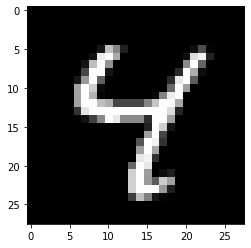

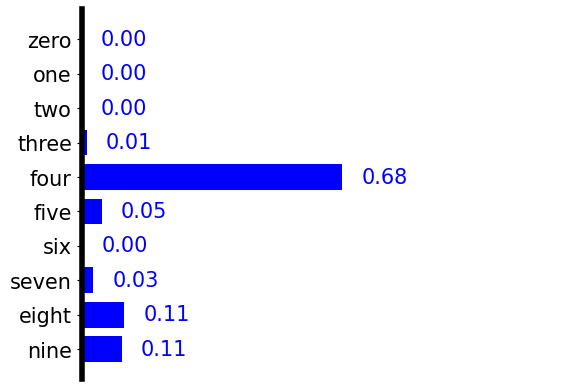

In [31]:
from random import randint
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
for i in range(5000):
    idx = randint(0,len(train_data)-1) # pick one randomly from 60000
    
    inputs = train_data[idx].view(1,784) # [Batch, InputSize]
    labels = train_label[idx].view(1) # make to tensor of size 1
    
    inputs.requires_grad_()
    probs = net(inputs)
    
    log_probs = torch.log(probs)
    loss = criterion(log_probs, labels)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    
p = net(test_data[6].view(1,784)) 
print(p)
utils.show(test_data[6])
utils.show_prob_mnist(p)

### 2.4.3 Train One Layer Net (MNIST) with mini-batch
indices=torch.LongTensor(2).random_(0,5) ---- [0,5)

In [43]:
indices=torch.LongTensor(5).random_(0,len(train_data)) ; print(indices)

tensor([12546, 17986, 16283, 29552,  4990])


tensor([[3.0081e-03, 2.1243e-05, 1.1068e-02, 7.5577e-04, 2.2639e-02, 1.9450e-03,
         2.3036e-03, 1.6187e-02, 4.4935e-03, 9.3758e-01]],
       grad_fn=<SoftmaxBackward>)


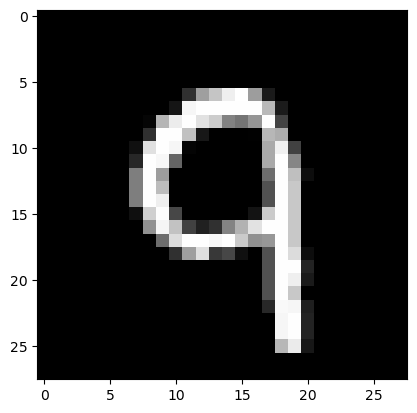

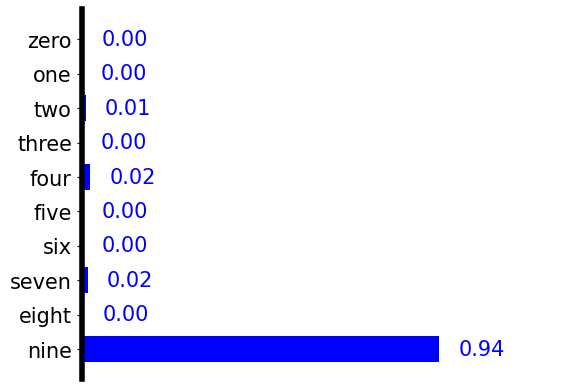

In [33]:
net = One_Layer_Net(784, 10)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
bs = 200

for iter in range(1,5000):
    # create a minibatch
    indices=torch.LongTensor(bs).random_(0,len(train_data)) 
    minibatch_data = train_data[indices]
    minibatch_label= train_label[indices]
    
    #reshape them to fit the network
    inputs = minibatch_data.view(bs, 784)

    # feed the input to the net  
    inputs.requires_grad_()
    prob = net(inputs) 
    
    log_prob = torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    
idx = randint(0, len(test_data)-1)    
p = net(test_data[idx].view(1,784)) 
print(p)
utils.show(test_data[idx])
utils.show_prob_mnist(p)

# 3. Cross Entropy (labs_lecture04)
criterion = nn.CrossEntropyLoss()

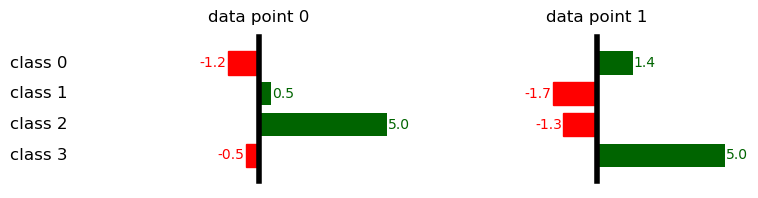

loss =  0.023508397862315178  good!


In [34]:
criterion = nn.CrossEntropyLoss()
labels = torch.LongTensor([2,3])
scores = torch.Tensor([[-1.2, 0.5 , 5, -0.5], [1.4, -1.7 , -1.3, 5.0]])
utils.display_scores(scores)
average_loss = criterion(scores, labels)
print('loss = ', average_loss.item(), " good!")

# 4. MLP + Full Training Loop (labs_lecture05)

## 4.1 Epoch
Shuffled Indices

In [35]:
bs = 2
shuffled_indices = torch.randperm(10) #len of train_data
for count in range(0,10,bs):
    batch_of_indices = shuffled_indices[count:count+bs]
    print(batch_of_indices)

tensor([6, 9])
tensor([1, 4])
tensor([5, 0])
tensor([8, 2])
tensor([3, 7])


## 4.2 Monitoring Loss
running_loss += loss.detach().item() \
error = utils.get_error(scores.detach(), minibatch_label) \
running_error += error.item()

total_loss = running_loss/num_batches \
total_error = running_error/num_batches 

## 4.3 Full Loop

In [36]:
class three_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
        super(three_layer_net , self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1) 
        self.layer2 = nn.Linear(hidden_size2, hidden_size2) 
        self.layer3 = nn.Linear(hidden_size2, output_size) 
        
    def forward(self, x):
        
        y       = self.layer1(x) 
        y_hat   = F.relu(y) 
        z       = self.layer2(y_hat) 
        z_hat   = F.relu(z) 
        scores  = self.layer3(z_hat)
        
        return scores

In [37]:
import time
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# device = torch.device("cpu")

cuda:0


In [38]:
net = three_layer_net(784, 200, 200, 10).to(device)
print(net)
utils.display_num_param(net)

three_layer_net(
  (layer1): Linear(in_features=784, out_features=200, bias=True)
  (layer2): Linear(in_features=200, out_features=200, bias=True)
  (layer3): Linear(in_features=200, out_features=10, bias=True)
)
There are 199210 (0.20 million) parameters in this neural network


In [39]:
def eval_on_test_set():
    running_error = 0
    num_batches = 0
    for i in range(0, len(test_data), bs):
        minibatch_data = test_data[i:i+bs].to(device)
        minibatch_label = test_label[i:i+bs].to(device)
        inputs = minibatch_data.view(bs, 784)
        scores = net(inputs)
        error = utils.get_error(scores, minibatch_label)
        running_error += error.detach().item()
        num_batches += 1
    total_error = running_error / num_batches
    print(f"=> test error: {total_error*100} %")

In [40]:
criterion = nn.CrossEntropyLoss()
bs = 200
lr = 0.05 # initial learning rate

In [41]:
start = time.time()
for epoch in range(200):
    # update learning rate based on lr strategy
    if epoch % 10 == 0 and epoch > 10: 
        lr = lr / 1.5 
    
    # reset optimizer with new learning rate
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    
    running_loss = 0
    running_error = 0
    num_batches = 0
    
    shuffled_indices=torch.randperm(len(train_data)) # 60000
    
    for count in range(0, len(train_data), bs):
        optimizer.zero_grad() 
        
        batch_of_indices = shuffled_indices[count:count+bs]
        minibatch_data = train_data[count:count+bs].to(device)
        minibatch_label = train_label[count:count+bs].to(device)
        
        inputs = minibatch_data.view(bs, 784)
        # tell Pytorch to start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()
        
        scores = net(inputs)
        
        loss = criterion(scores, minibatch_label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.detach().item()
        error = utils.get_error(scores, minibatch_label)
        running_error += error.detach().item()
        num_batches += 1
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    if epoch % 10 == 0 : 
        print(' ') 
        print(f"epoch={epoch}, time={elapsed_time}, loss={total_loss}, error={total_error*100}%, lr={lr}")
        eval_on_test_set()
    

 
epoch=0, time=1.190460205078125, loss=1.2401535499095917, error=29.221668501694996%, lr=0.05
=> test error: 13.590002059936523 %
 
epoch=10, time=6.121979713439941, loss=0.15524459696064394, error=4.440002262592316%, lr=0.05
=> test error: 4.520002126693726 %
 
epoch=20, time=10.971051216125488, loss=0.08337840063807865, error=2.3850033283233643%, lr=0.03333333333333333
=> test error: 3.050002336502075 %
 
epoch=30, time=15.952506065368652, loss=0.06007257326040417, error=1.6633368929227195%, lr=0.022222222222222223
=> test error: 2.490002393722534 %
 
epoch=40, time=20.997039079666138, loss=0.04911688884409766, error=1.2916697263717651%, lr=0.014814814814814815
=> test error: 2.3500022888183594 %
 
epoch=50, time=26.793145895004272, loss=0.043094217761730155, error=1.1066695054372153%, lr=0.009876543209876543
=> test error: 2.1900020837783813 %
 
epoch=60, time=31.758091926574707, loss=0.03950729878153652, error=0.9733358422915142%, lr=0.006584362139917695
=> test error: 2.190002083

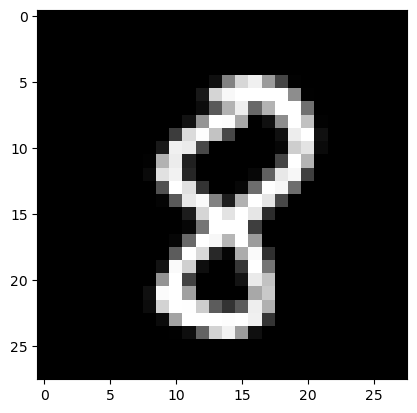

torch.Size([1, 10])


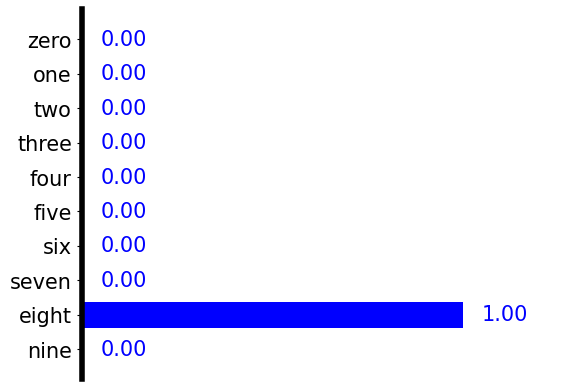

In [42]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores = net(im.view(1,784).to(device)) 
probs = F.softmax(scores, dim=1)
print(probs.shape)
utils.show_prob_mnist(probs.cpu())